1. Load the tips dataset from either pydataset or seaborn.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline


from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.formula.api import ols

import split_scale

In [10]:
df = pydataset.data("tips")

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [16]:
#split the data so we don't overfit the model
train, test = split_scale.split_my_data(df)

In [17]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
149,9.78,1.73,Male,No,Thur,Lunch,2
214,13.27,2.50,Female,Yes,Sat,Dinner,2
179,9.60,4.00,Female,Yes,Sun,Dinner,2
42,17.46,2.54,Male,No,Sun,Dinner,2
120,24.08,2.92,Female,No,Thur,Lunch,4


In [18]:
train = train[["total_bill","tip"]]

In [19]:
train.head()

,total_bill,tip
149,9.78,1.73
214,13.27,2.50
179,9.60,4.00
42,17.46,2.54
120,24.08,2.92


In [21]:
train.columns = ['x', 'y']

In [22]:
train.head()

,x,y
149,9.78,1.73
214,13.27,2.50
179,9.60,4.00
42,17.46,2.54
120,24.08,2.92


Evaluate baseline "performance" our model must "beat"

In [23]:
train['yhat_bl'] = train.y.median()

In [24]:
train['yhat_mean'] = train.y.mean()

In [25]:
train.head()

,x,y,yhat_bl,yhat_mean
149,9.78,1.73,2.745,2.896882
214,13.27,2.50,2.745,2.896882
179,9.60,4.00,2.745,2.896882
42,17.46,2.54,2.745,2.896882
120,24.08,2.92,2.745,2.896882


In [26]:
rmse_bl = sqrt(mean_squared_error(train.y, train.yhat_bl))
rmse_mean = sqrt(mean_squared_error(train.y, train.yhat_mean))

In [27]:
print(rmse_bl, rmse_mean)

1.2477911071404635 1.2385129785044142


Now that I have my baseline (yhat_mean) I'll build my simple regression model

In [29]:
ols_model = ols('y ~ x', data = train).fit()

In [31]:
train['yhat'] = ols_model.predict(train.x)

In [32]:
train.head()

,x,y,yhat_bl,yhat_mean,yhat
149,9.78,1.73,2.745,2.896882,2.038397
214,13.27,2.50,2.745,2.896882,2.358964
179,9.60,4.00,2.745,2.896882,2.021863
42,17.46,2.54,2.745,2.896882,2.743828
120,24.08,2.92,2.745,2.896882,3.351895


3. Plot the residuals for the linear regression model that you made.

In [38]:
train['residual'] = train['yhat'] - train['y']
train['residual_baseline'] = train['yhat_bl'] - train['y']

In [39]:
train.head()

,x,y,yhat_bl,yhat_mean,yhat,residual,residual_baseline
149,9.78,1.73,2.745,2.896882,2.038397,0.308397,1.015
214,13.27,2.50,2.745,2.896882,2.358964,-0.141036,0.245
179,9.60,4.00,2.745,2.896882,2.021863,-1.978137,-1.255
42,17.46,2.54,2.745,2.896882,2.743828,0.203828,0.205
120,24.08,2.92,2.745,2.896882,3.351895,0.431895,-0.175


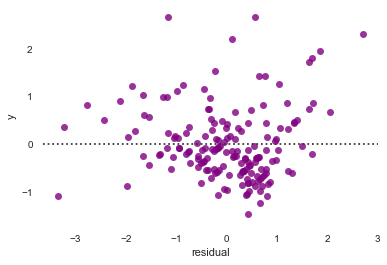

In [52]:
sns.residplot(data = train, x="residual", y="y", color="purple")

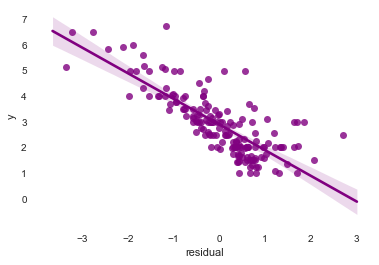

In [49]:
sns.regplot(data = train, x="residual", y="y", color="purple")

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [53]:
rmse = sqrt(mean_squared_error(train.y, train.yhat))

In [54]:
rmse

0.9807102642183347

In [ ]:
ESS =
TSS=